# Get the data

In [1]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("data", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
os.chdir("..")
housing_url= HOUSING_URL
housing_path= os.path.join(os.getcwd(),HOUSING_PATH)

if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
    print("Hola")
tgz_path = os.path.join(housing_path, "housing.tgz")
urllib.request.urlretrieve(housing_url, tgz_path)
housing_tgz = tarfile.open(tgz_path)
housing_tgz.extractall(path=housing_path)
housing_tgz.close()


# Open the dataset

In [2]:
import pandas as pd

df = pd.read_csv(HOUSING_PATH + "/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


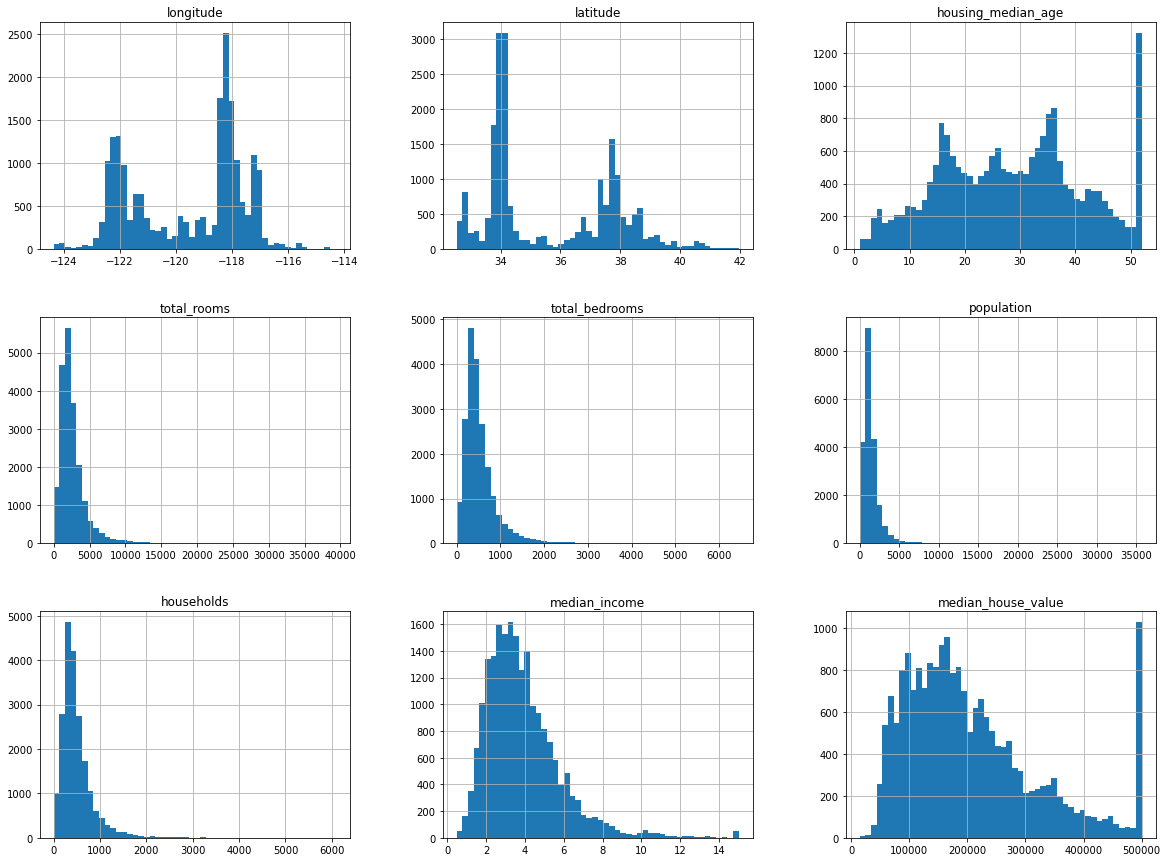

In [7]:
%matplotlib inline  
#only in a Jupyter notebook
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

1. Podemos notar que para el atributo median_income los datos son raros. Nos comentan que estan acotados y escalados. Estan acotados de 15 a .5 y que estan en unidades de 10,000.


# Get the test data set
Es importente mantener a lado un data set de pruebas mucho antes de que empieces a ver mas el data set. Ya que si lo ves y lo analizas podrias caer en overfitting ya que selecciónarias un modelo que este a doc a esos datos.


In [8]:
import numpy as np

In [9]:
def split_train_set(data, test_ratio):
    shuffle_indices = np.random.permutation(len(data)) #Se realiza una combinación
    test_set_size = int(len(data)*test_ratio)
    test_set_indices = shuffle_indices[:test_set_size]
    train_set_indices = shuffle_indices[test_set_size:]
    return df.iloc[test_set_indices], df.iloc[train_set_indices]

In [10]:
#Realizamos la seleccion de data sets

df_test, df_train = split_train_set(data=df, test_ratio=0.2)

In [11]:
df_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10553,-117.71,33.64,14.00,2945.00,356.00,1293.00,335.00,8.11,308900.00,<1H OCEAN
12901,-121.33,38.62,19.00,1853.00,415.00,772.00,397.00,2.26,135800.00,INLAND
11637,-118.03,33.83,25.00,768.00,195.00,529.00,184.00,3.17,132800.00,<1H OCEAN
10939,-117.89,33.73,32.00,728.00,134.00,837.00,135.00,4.08,163900.00,<1H OCEAN
19202,-122.71,38.43,38.00,1689.00,526.00,1071.00,529.00,1.50,124000.00,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
3916,-118.52,34.19,37.00,1892.00,347.00,1039.00,343.00,4.83,212100.00,<1H OCEAN
19291,-122.86,38.42,38.00,1166.00,223.00,584.00,225.00,3.67,244400.00,<1H OCEAN
20331,-119.04,34.24,20.00,7794.00,1192.00,4169.00,1188.00,5.93,311900.00,<1H OCEAN
13714,-117.12,34.10,40.00,96.00,14.00,46.00,14.00,3.27,162500.00,INLAND


In [12]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16985,-122.29,37.56,12.00,6474.00,1467.00,2516.00,1390.00,5.04,305800.00,NEAR BAY
5157,-118.28,33.95,40.00,2044.00,538.00,2150.00,524.00,2.14,94800.00,<1H OCEAN
2330,-119.72,36.82,16.00,2627.00,613.00,1054.00,623.00,1.95,112500.00,INLAND
10299,-117.87,33.92,17.00,4575.00,764.00,2054.00,737.00,6.06,272400.00,<1H OCEAN
3616,-118.44,34.26,28.00,1077.00,288.00,1377.00,293.00,3.92,153900.00,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
9190,-118.35,34.32,52.00,102.00,29.00,54.00,32.00,1.99,191700.00,<1H OCEAN
11035,-117.81,33.78,27.00,3589.00,507.00,1484.00,495.00,5.79,270500.00,<1H OCEAN
15214,-117.11,32.97,9.00,1531.00,242.00,850.00,240.00,6.09,263600.00,<1H OCEAN
3553,-118.61,34.22,24.00,5256.00,758.00,2474.00,780.00,7.33,333700.00,<1H OCEAN


Podemos usar un modulo de scikit learn para hacer esta separación

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [15]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.00,3126.00,627.00,2300.00,623.00,3.26,103000.00,NEAR OCEAN
8267,-118.16,33.77,49.00,3382.00,787.00,1314.00,756.00,3.81,382100.00,NEAR OCEAN
17445,-120.48,34.66,4.00,1897.00,331.00,915.00,336.00,4.16,172600.00,NEAR OCEAN
14265,-117.11,32.69,36.00,1421.00,367.00,1418.00,355.00,1.94,93400.00,NEAR OCEAN
2271,-119.80,36.78,43.00,2382.00,431.00,874.00,380.00,3.55,96500.00,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.00,1330.00,201.00,658.00,217.00,6.37,229200.00,<1H OCEAN
11964,-117.43,34.02,33.00,3084.00,570.00,1753.00,449.00,3.05,97800.00,INLAND
5390,-118.38,34.03,36.00,2101.00,569.00,1756.00,527.00,2.93,222100.00,<1H OCEAN
860,-121.96,37.58,15.00,3575.00,597.00,1777.00,559.00,5.72,283500.00,<1H OCEAN


In [16]:
df_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.00,1505.00,NaN,1392.00,359.00,1.68,47700.00,INLAND
3024,-119.46,35.14,30.00,2943.00,NaN,1565.00,584.00,2.53,45800.00,INLAND
15663,-122.44,37.80,52.00,3830.00,NaN,1310.00,963.00,3.48,500001.00,NEAR BAY
20484,-118.72,34.28,17.00,3051.00,NaN,1705.00,495.00,5.74,218600.00,<1H OCEAN
9814,-121.93,36.62,34.00,2351.00,NaN,1063.00,428.00,3.73,278000.00,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.00,3165.00,482.00,1351.00,452.00,4.61,263300.00,<1H OCEAN
16623,-120.83,35.36,28.00,4323.00,886.00,1650.00,705.00,2.73,266800.00,NEAR OCEAN
18086,-122.05,37.31,25.00,4111.00,538.00,1585.00,568.00,9.23,500001.00,<1H OCEAN
2144,-119.76,36.77,36.00,2507.00,466.00,1227.00,474.00,2.79,72300.00,INLAND


Esto es muy util para muestras suficientemente grandes pero cuando las muestras son pequeñas debemos elegir con cuidado como vamos a realizar el muestreo.

Veamos como se estratifica la variable de ingreso medio

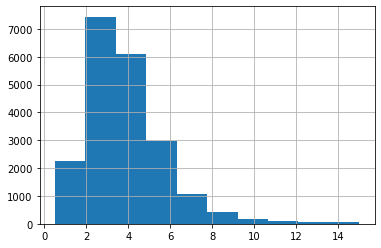

In [17]:
df['median_income'].hist()
plt.show()

<AxesSubplot:>

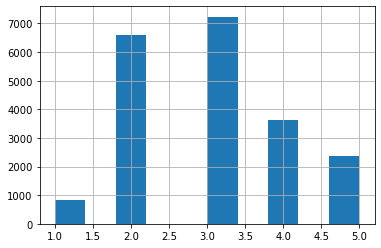

In [18]:
df['income_cat'] = pd.cut(df['median_income'], bins=[0,1.5,3,4.5,6, np.inf], labels =[1,2,3,4,5])
df['income_cat'].hist()

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(df, df['income_cat']):
    df_stratified_train = df.iloc[train_index]
    df_stratified_test = df.iloc[test_index]

In [20]:
df_stratified_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.00,1568.00,351.00,710.00,339.00,2.70,286600.00,<1H OCEAN,2
18632,-121.93,37.05,14.00,679.00,108.00,306.00,113.00,6.42,340600.00,<1H OCEAN,5
14650,-117.20,32.77,31.00,1952.00,471.00,936.00,462.00,2.86,196900.00,NEAR OCEAN,2
3230,-119.61,36.31,25.00,1847.00,371.00,1460.00,353.00,1.88,46300.00,INLAND,2
3555,-118.59,34.23,17.00,6592.00,1525.00,4459.00,1463.00,3.03,254500.00,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.00,1271.00,236.00,573.00,210.00,4.93,240200.00,INLAND,4
12053,-117.56,33.88,40.00,1196.00,294.00,1052.00,258.00,2.07,113000.00,INLAND,2
13908,-116.40,34.09,9.00,4855.00,872.00,2098.00,765.00,3.27,97800.00,INLAND,3
11159,-118.01,33.82,31.00,1960.00,380.00,1356.00,356.00,4.06,225900.00,<1H OCEAN,3


In [21]:
df_stratified_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.00,6447.00,1012.00,2184.00,960.00,8.28,500001.00,<1H OCEAN,5
10970,-117.86,33.77,39.00,4159.00,655.00,1669.00,651.00,4.61,240300.00,<1H OCEAN,4
20351,-119.05,34.21,27.00,4357.00,926.00,2110.00,876.00,3.01,218200.00,<1H OCEAN,3
6568,-118.15,34.20,52.00,1786.00,306.00,1018.00,322.00,4.15,182100.00,INLAND,3
13285,-117.68,34.07,32.00,1775.00,314.00,1067.00,302.00,4.04,121300.00,INLAND,3
...,...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.00,4988.00,1169.00,2414.00,1075.00,1.97,76400.00,INLAND,2
17430,-120.44,34.65,30.00,2265.00,512.00,1402.00,471.00,1.98,134000.00,NEAR OCEAN,2
4019,-118.49,34.18,31.00,3073.00,674.00,1486.00,684.00,4.90,311700.00,<1H OCEAN,4
12107,-117.32,33.99,27.00,5464.00,850.00,2400.00,836.00,4.71,133500.00,INLAND,4


In [22]:
#Eliminamos la columna de categorización de los dataset de entrenamiento y prueba.

for set_ in (df_stratified_train, df_stratified_test):
    set_.drop("income_cat", axis=1, inplace=True)


C:\Users\maxla\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Discover and Visualize

In [23]:
housing =  df_stratified_train.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

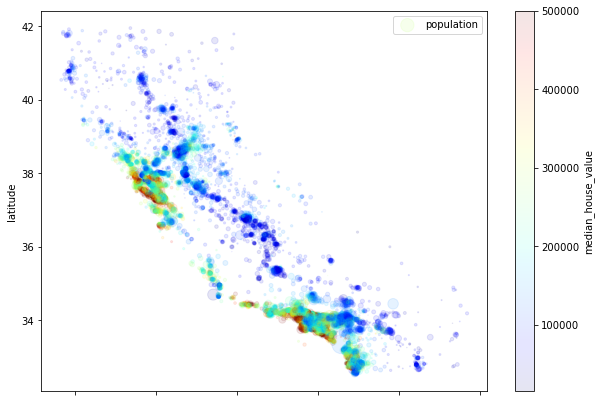

In [29]:
housing.plot(kind='scatter', y = "latitude", x = "longitude", alpha = 0.1, s=housing["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
                figsize=(10,7))

In [32]:
corr_matriz = housing.corr()

In [34]:
corr_matriz["median_house_value"].sort_values(ascending=False)

median_house_value    1.00
median_income         0.69
total_rooms           0.14
housing_median_age    0.11
households            0.06
total_bedrooms        0.05
population           -0.03
longitude            -0.05
latitude             -0.14
Name: median_house_value, dtype: float64

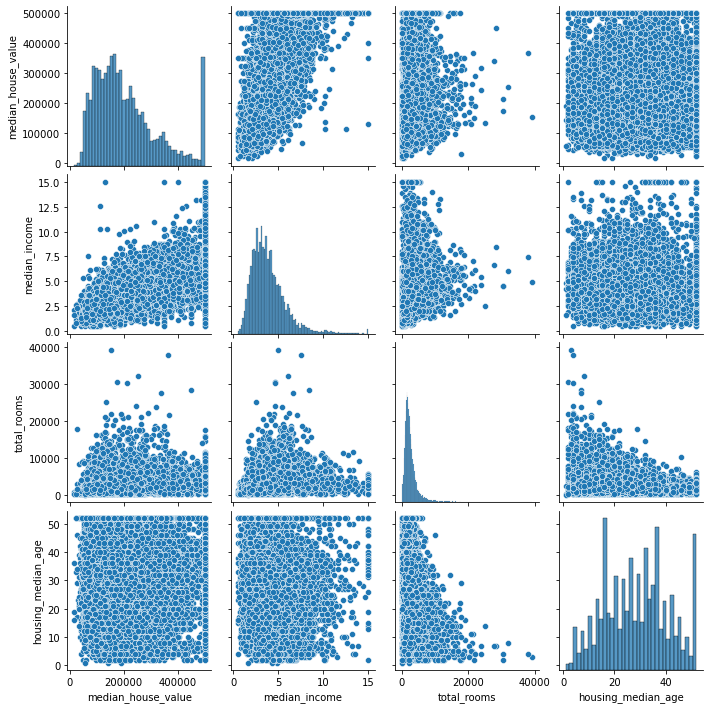

In [36]:
import seaborn as sns
atributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
sns.pairplot(housing[atributes])

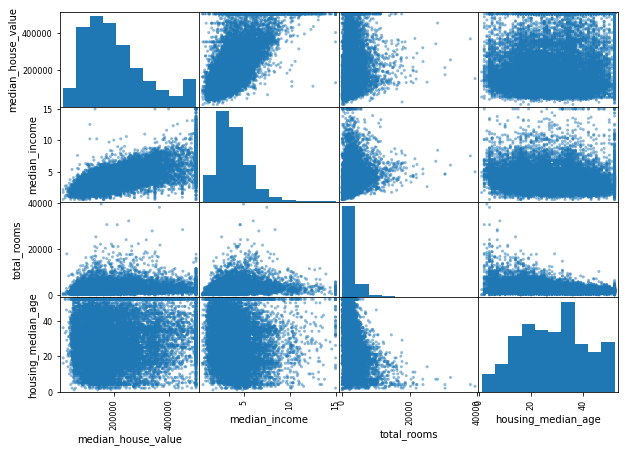

In [38]:
from pandas.plotting import scatter_matrix

scatter_matrix(housing[atributes], figsize=(10,7))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

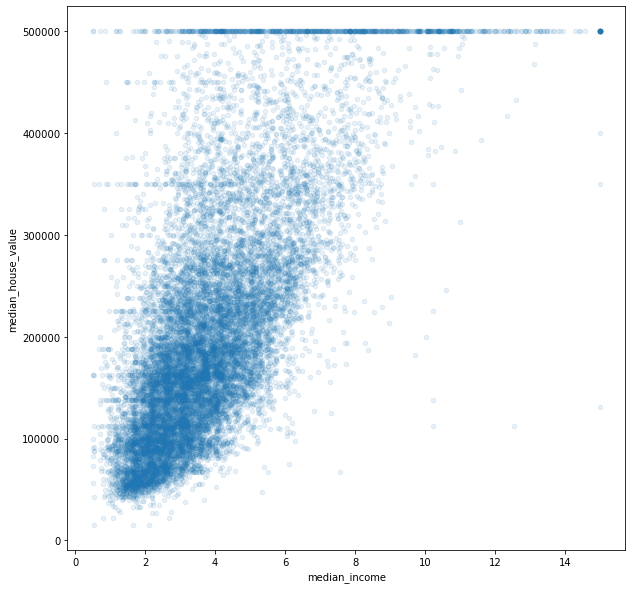

In [42]:
housing.plot(kind="scatter", y="median_house_value", x="median_income", alpha = 0.1, figsize=(10,10))

# Atributos combinados

In [45]:
housing["room_per_household"] = housing["total_rooms"]/housing["households"]
housing["beedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]= housing["population"]/housing["households"]


In [47]:
corr_matriz = housing.corr()
corr_matriz["median_house_value"].sort_values(ascending=False)

median_house_value          1.00
median_income               0.69
room_per_household          0.15
total_rooms                 0.14
housing_median_age          0.11
households                  0.06
total_bedrooms              0.05
population_per_household   -0.02
population                 -0.03
longitude                  -0.05
latitude                   -0.14
beedrooms_per_room         -0.26
Name: median_house_value, dtype: float64

# Preparar los datos para el algoritmos (impute)

In [48]:
#Del dataset de entrenamiento se dividira las etiquetas. 
housing = df_stratified_train.drop("median_house_value", axis=1)
housing_labels = df_stratified_train["median_house_value"].copy()


In [50]:
#Sabemos que total_bedrooms tiene datos nulos

housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [53]:
#Se usara la mediana para rellenar esos espacios

from sklearn.impute import SimpleImputer
#1. Llamamos al constructor
impute = SimpleImputer(strategy="median")

#2 Solo funciona para datos numericos. Por tanto eliminaremos la variable categorica del train_set
housing_num = housing.drop("ocean_proximity", axis=1)

#3 Entrenamos el "modelo"
impute.fit(housing_num)

#4 Nos retornara un arreglo de numpy con las medianas correspondientes a las columnas. Serian 8
print(f'{impute.statistics_} con {len(impute.statistics_)} elementos')

#4.5 Podemos verificar que es exactamente igual que calcular housing_num.median().values()
print(housing_num.median().values)

#5 Rellenamos los valores con el metodo transform. Nos retornara un objeto array de numpy
X = impute.transform(housing_num)

#6 Convertimos ese arreglo en un df de pandas
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

housing_tr


[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409] con 8 elementos
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.00,1568.00,351.00,710.00,339.00,2.70
18632,-121.93,37.05,14.00,679.00,108.00,306.00,113.00,6.42
14650,-117.20,32.77,31.00,1952.00,471.00,936.00,462.00,2.86
3230,-119.61,36.31,25.00,1847.00,371.00,1460.00,353.00,1.88
3555,-118.59,34.23,17.00,6592.00,1525.00,4459.00,1463.00,3.03
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.00,1271.00,236.00,573.00,210.00,4.93
12053,-117.56,33.88,40.00,1196.00,294.00,1052.00,258.00,2.07
13908,-116.40,34.09,9.00,4855.00,872.00,2098.00,765.00,3.27
11159,-118.01,33.82,31.00,1960.00,380.00,1356.00,356.00,4.06


In [54]:
#Vemos la info del dataframe
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


# Handling text and categorical attributes (OrdinalEncoder-OneHotEncoder)

In [55]:
#Hechemos un vistazo a la unica variable categorica de nuestro data-set

#1. Guardamos los datos categoricos en una variable aparte

housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [58]:
#1 Importamos la libreria
from sklearn.preprocessing import OrdinalEncoder

#2 llamamos al constructor
ordinal_encoder = OrdinalEncoder()

#3 Entrenamos y transformamos las variables categoricas a numericas con el metodo fit_transform()
housing_encode_cat = ordinal_encoder.fit_transform(housing_cat)

#4 Inspeccionamos las tranformaciones
ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [60]:
#5 Vemos la variable housing_encode_cat
housing_encode_cat[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

Esto es genial pero un algoritmo de machine learning podria asumir que, dado que son valores numericos, que la categoria 0 es muy cercana a la categoria 1.
Lo cual podemos ver que no es cierto. La categoria 0 es muy similar a la categoria 4 pero numericamente esto esta alejado.

Para arreglar este problema Scikit provee de otro metodo llamado **OneHotEncoder**

In [61]:
#1 importamos el modulo OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

#2 llamamos al constructor
one_hot = OneHotEncoder()

#3 Lo entrenemos con los datos categoricos y realizamos la transformación
housing_1h_encoder = one_hot.fit_transform(housing_cat)

#4 Veremos que nos retorna un objeto matriz sparse
print(housing_1h_encoder)

#5 Lo transformamos a un formato que podamos leer
housing_1h_encoder.toarray()

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
  (4, 0)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 1)	1.0
  (12, 0)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 0)	1.0
  (16, 3)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 1)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 1)	1.0
  (16489, 4)	1.0
  (16490, 3)	1.0
  (16491, 0)	1.0
  (16492, 3)	1.0
  (16493, 1)	1.0
  (16494, 1)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 3)	1.0
  (16498, 1)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16501, 0)	1.0
  (16502, 4)	1.0
  (16503, 0)	1.0
  (16504, 1)	1.0
  (16505, 1)	1.0
  (16506, 0)	1.0
  (16507, 1)	1.0
  (16508, 1)	1.0
  (16509, 1)	1.0
  (16510, 0)	1.0
  (16511, 3)	1.0


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

# Custom Transformer


In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
    

In [63]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

# Feature Scaling (MinMaxScaler-StandardScaler)

El escalado de atributos es un paso importante en la preparación de los datos ya que muchos algoritmos de machine learning no funcionan bien con variables escaladas de diferente forma.
Tenemos dos opciones muy comunes para realizar esta escalada:

1. MinMaxScaler
2. StandardScaler

Lo usaremos en el siguiente bloque de código.


# Transformation pipelines

Com 